      hostname       os   enviroment  country  node
0     LDESP001    Linux  Development    Spain     1
1     ASDEU001      AIX      Staging  Germany     1
2     LPITA001    Linux   Production    Italy     1
3     ASITA001      AIX      Staging    Italy     1
4     SSIRL001  Solaris      Staging  Ireland     1
...        ...      ...          ...      ...   ...
1495  SPIRL036  Solaris   Production  Ireland    36
1496  LSFRA015    Linux      Staging   France    15
1497  SPDEU032  Solaris   Production  Germany    32
1498  LPDEU042    Linux   Production  Germany    42
1499  AIDEU011      AIX  Integration  Germany    11

[1500 rows x 5 columns]


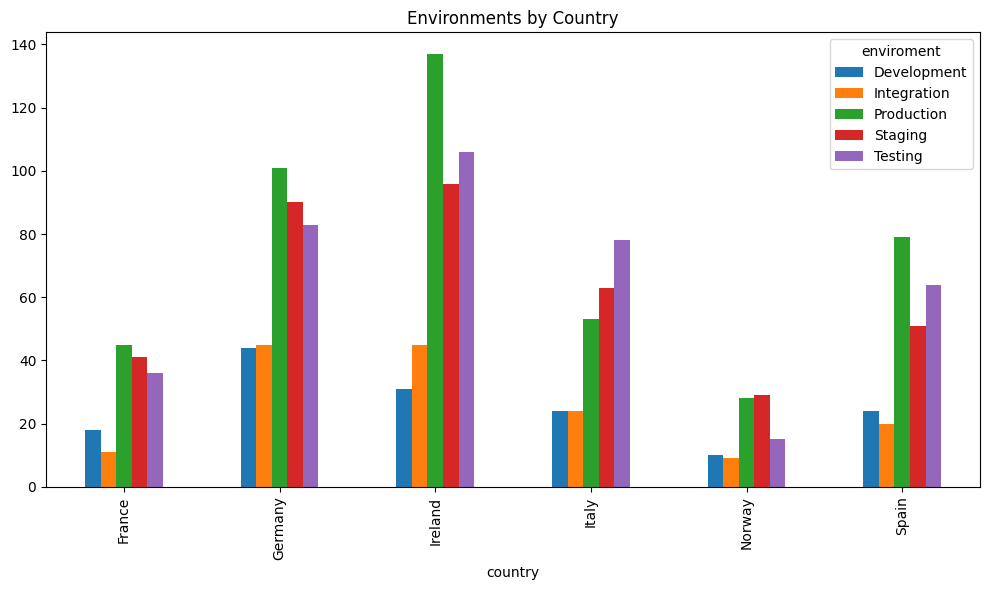

Text(0, 0.5, 'Number of Hosts')

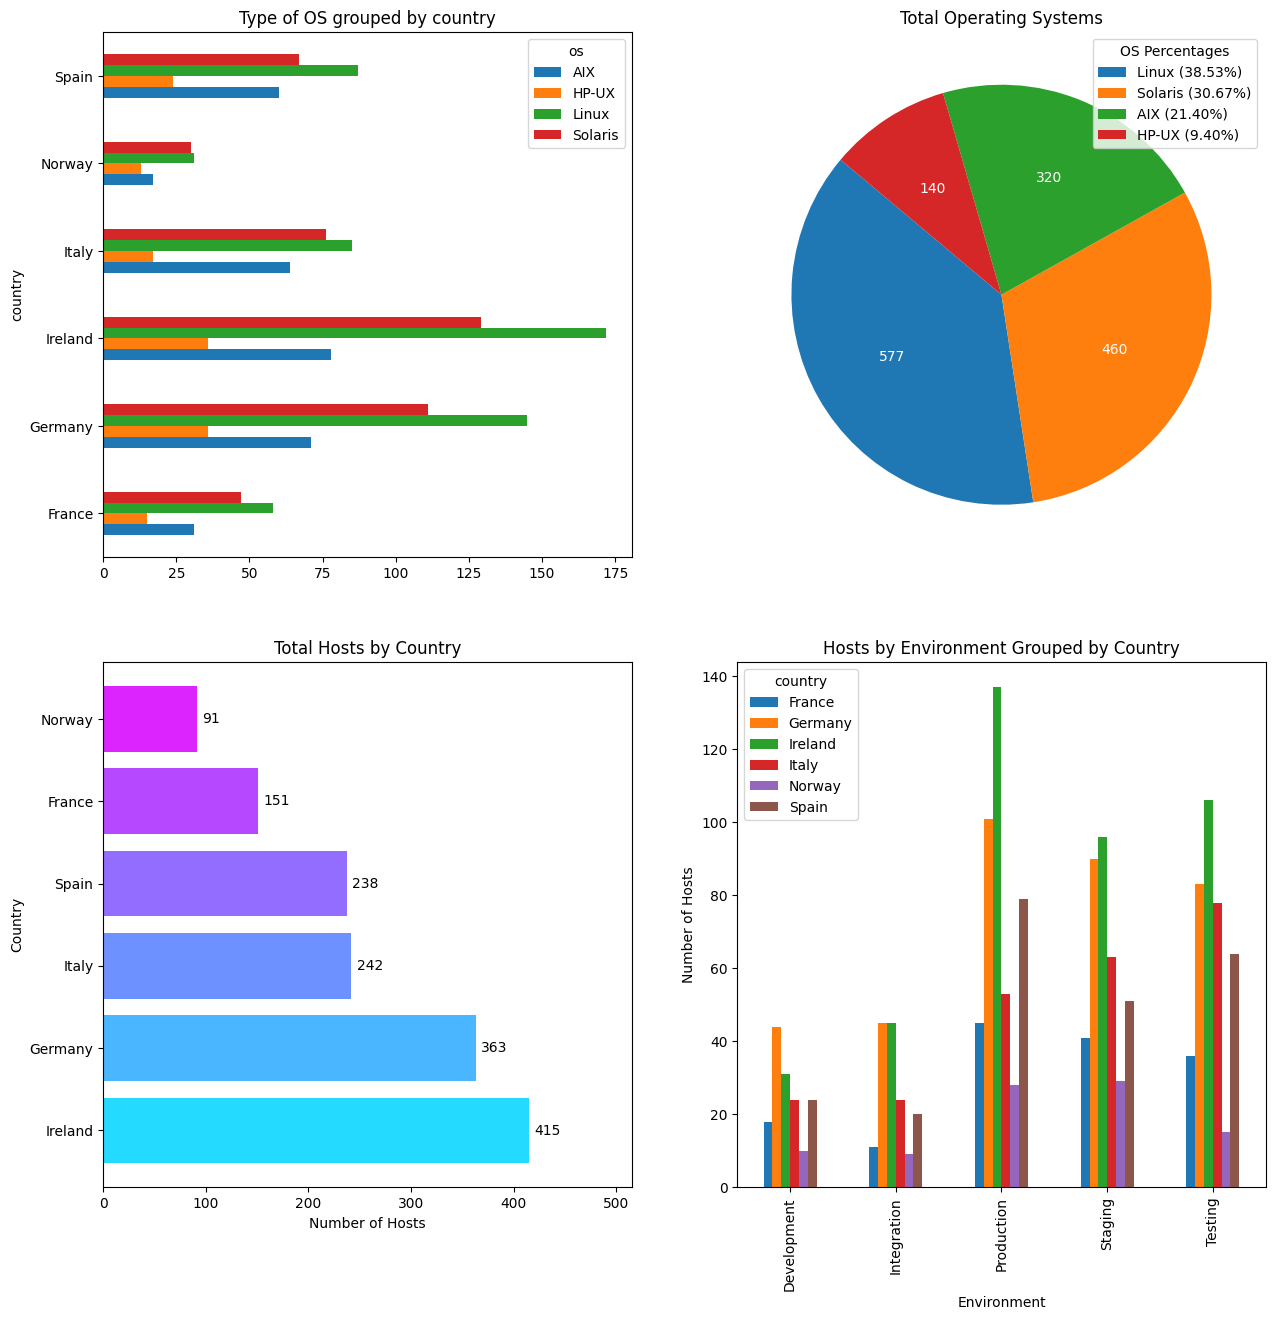

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Inicializar variables globales
dataset = []  # Lista para almacenar los datos generados de los hosts
df = None     # DataFrame global para contener los datos finales

# Función para generar hostnames
def set_hostnames(number_of_hosts: int):
    hostnames = []  # Lista para almacenar los hostnames generados
    # Probabilidades de selección para sistemas operativos (OS)
    os_probs = ["L"] * 40 + ["S"] * 30 + ["A"] * 20 + ["H"] * 10
    # Probabilidades de selección para entornos (environment)
    env_probs = ["D"] * 10 + ["I"] * 10 + ["T"] * 25 + ["S"] * 25 + ["P"] * 30
    # Probabilidades de selección para países
    country_probs = (
        ["NOR"] * 6 + ["FRA"] * 9 + ["ITA"] * 16 + ["ESP"] * 16 + ["DEU"] * 23 + ["IRL"] * 30
    )
    node_counters = {}  # Diccionario para llevar el conteo de nodos por combinación

    # Generar hostnames únicos para el número especificado de hosts
    for _ in range(number_of_hosts):
        os = random.choice(os_probs)         # Seleccionar sistema operativo aleatorio
        env = random.choice(env_probs)       # Seleccionar entorno aleatorio
        country = random.choice(country_probs)  # Seleccionar país aleatorio

        key = (os, env, country)  # Clave única para identificar combinaciones
        if key not in node_counters:
            node_counters[key] = 0
        node_counters[key] += 1  # Incrementar el contador de nodos

        node = f"{node_counters[key]:03}"  # Formatear el número de nodo a 3 dígitos
        hostname = f"{os}{env}{country}{node}"  # Crear el hostname final
        hostnames.append(hostname)  # Añadir hostname a la lista

    return hostnames  # Devolver lista de hostnames generados

# Función para obtener el nombre de OS
def get_os(hostname: str):
    # Mapear el primer carácter del hostname al sistema operativo correspondiente
    return {"L": "Linux", "S": "Solaris", "A": "AIX", "H": "HP-UX"}.get(hostname[0], "Unknow")

# Función para obtener el nombre del entorno
def get_enviroment(hostname: str):
    # Mapear el segundo carácter del hostname al entorno correspondiente
    return {"D": "Development", "I": "Integration", "T": "Testing", "S": "Staging", "P": "Production"}.get(hostname[1], "Unknow")

# Función para obtener el nombre del país
def get_country(hostname: str):
    # Mapear los caracteres 2-5 del hostname al país correspondiente
    return {"NOR": "Norway", "FRA": "France", "ITA": "Italy", "ESP": "Spain", "DEU": "Germany", "IRL": "Ireland"}.get(hostname[2:5], "Unknow")

# Función para generar el DataFrame
def set_dataframe(count: int):
    global df  # Usar variable global para almacenar el DataFrame
    hostnames = set_hostnames(count)  # Generar lista de hostnames

    # Crear un diccionario para cada hostname con sus atributos
    for hostname in hostnames:
        dataset.append({
            "hostname": hostname,
            "os": get_os(hostname),  # Obtener sistema operativo
            "enviroment": get_enviroment(hostname),  # Obtener entorno
            "country": get_country(hostname),  # Obtener país
            "node": int(hostname[5:])  # Obtener número de nodo
        })
    df = pd.DataFrame(dataset)  # Crear el DataFrame con el dataset

# Generar un DataFrame con 1500 registros
set_dataframe(1500)
print(df)  # Imprimir el DataFrame generado

# Guardar el DataFrame como archivo CSV
df.to_csv("hosts.csv", index=False, header=True)
hosts_df = pd.read_csv("hosts.csv")  # Leer el archivo CSV para verificar

hosts_df  # Mostrar el DataFrame cargado desde el CSV

# Gráfico de barras: Entornos por país
env_country = df.groupby(["country", "enviroment"]).size().unstack(1)
env_country.plot(kind="bar", figsize=(10, 6), title="Environments by Country")  # Crear gráfico de barras
plt.tight_layout()  # Ajustar diseño del gráfico
plt.show()  # Mostrar gráfico

# Crear subplots para múltiples gráficos
fig, axes = plt.subplots(2, 2, figsize=(15, 15))

# Gráfico de barras horizontales: Tipos de OS por país
os_country = df.groupby(["country", "os"]).size().unstack(1)
os_country.plot(kind="barh", ax=axes[0, 0], title="Type of OS grouped by country")

# Gráfico de pastel: Porcentajes de sistemas operativos
os_total = df["os"].value_counts()  # Contar instancias de cada sistema operativo
os_percentage = (os_total / os_total.sum()) * 100  # Calcular porcentaje de cada sistema operativo

# Crear gráfico de pastel
wedges, texts, autotexts = axes[0, 1].pie(
    os_total,
    labels=os_total,  # Etiquetas de los sistemas operativos
    startangle=140,
    colors=sns.color_palette("tab10"),  # Colores para el gráfico
    textprops=dict(color="white", fontsize=10),  # Propiedades del texto
    autopct=lambda p: f'{int(p * os_total.sum() / 100)}'  # Mostrar valor real en el gráfico
)

# Añadir leyenda al gráfico de pastel
axes[0, 1].legend(
    [f"{os} ({pct:.2f}%)" for os, pct in zip(os_total.index, os_percentage)],
    title="OS Percentages",
    loc="upper right"
)
axes[0, 1].set_title("Total Operating Systems")  # Título del gráfico de pastel

# Gráfico de barras horizontales: Número total de hosts por país
country_hosts = df["country"].value_counts()  # Contar hosts por país
colors = sns.color_palette("cool", len(country_hosts))  # Generar colores
bars = axes[1, 0].barh(country_hosts.index, country_hosts, color=colors)  # Crear gráfico de barras
axes[1, 0].set_title("Total Hosts by Country")  # Título
axes[1, 0].set_xlabel("Number of Hosts")  # Etiqueta del eje X
axes[1, 0].set_ylabel("Country")  # Etiqueta del eje Y
axes[1, 0].set_xlim(0, country_hosts.max() + 100)  # Ajustar límites del eje X

# Añadir etiquetas a las barras
for bar in bars:
    width = bar.get_width()
    axes[1, 0].text(width + 5, bar.get_y() + bar.get_height() / 2, f"{int(width)}", va="center")

# Gráfico de barras: Hosts por entorno agrupados por país
env_country = df.groupby(["enviroment", "country"]).size().unstack(1)
env_country.plot(kind="bar", ax=axes[1, 1], title="Hosts by Environment Grouped by Country")
axes[1, 1].set_xlabel("Environment")  # Etiqueta del eje X
axes[1, 1].set_ylabel("Number of Hosts")  # Etiqueta del eje Y
